# In-class Programming Assignment 1: Image Processing

## Overview:

In this lab, we will process a series of images using algorithms such as thresholding and
connected components to perform obstacle detection for a planetary rover. To complete the
assignment you must submit via Canvas a screenshot / image of the final result you obtained
after running your code.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
# Mount a Google Drive folder so that the data files can be accessed
# This step may be skipped when running this notebook locally
from google.colab import drive
from google.colab import files
import sys
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/InClass1/
sys.path.insert(0,'/content/drive/MyDrive/InClass1/')

Mounted at /content/drive
/content/drive/MyDrive/InClass1


input_image (571, 777, 3) uint8 0 255


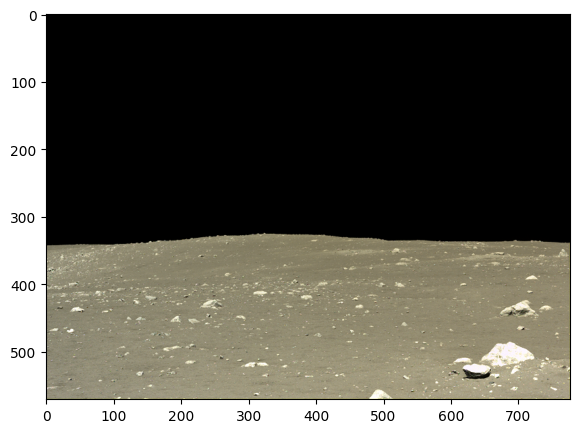

In [5]:
# Read the input image as a Numpy array
input_image = cv2.imread('moon.png')

# OpenCV reads the image in BGR format, this converts it to RGB format
input_image = input_image[:,:,::-1]
print('input_image', input_image.shape, input_image.dtype, input_image.min(), input_image.max())

# Use Matplotlib to draw the image
plt.figure()
plt.imshow(input_image)


In [10]:
#print(input_image.shape)
#print(input_image)
print(input_image[500, 100])

[141 138 118]


## 1. Thresholding

The first step is to assign each pixel in the input image as either rock or not-rock. We can make
use of the property that rocks appear at a higher intensity in the image. Thresholding refers to the
process of creating a binary image by applying a threshold on the pixel intensity such that pixels
that fall above the threshold are assigned a value of 1 whereas pixels that fall below the threshold
are assigned a value of 0.

grayscale_image [[  0.33333333   0.           0.33333333 ...   0.           0.33333333
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [140.33333333 146.33333333 137.66666667 ... 158.66666667 149.33333333
  143.66666667]
 [127.33333333 132.33333333 135.66666667 ... 160.33333333 158.33333333
  145.66666667]
 [121.66666667 137.33333333 129.         ... 157.66666667 148.66666667
  135.        ]] (571, 777) float64 0.0 255.0
binary_image (571, 777) bool False True


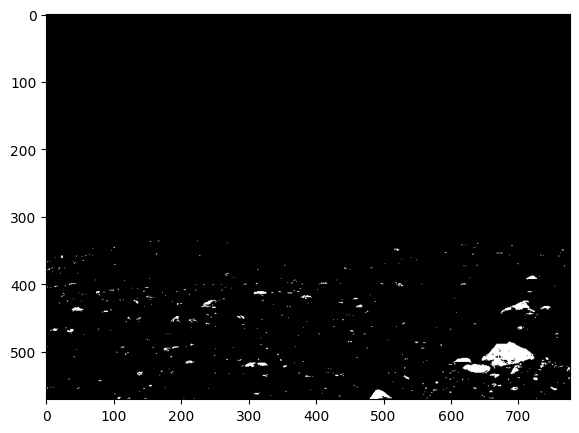

In [16]:
# TODO: convert the original image into a grayscale image
# each pixel in the grayscale image is the mean of 3 color channels in the original image (RGB)
grayscale_image = input_image.mean(axis=-1)
print('grayscale_image', grayscale_image, grayscale_image.shape, grayscale_image.dtype, grayscale_image.min(), grayscale_image.max())
# TODO: create a binary image by thresholding the grayscale image
# each pixel in the binary image is either True or False based on
# whether the grayscale pixel passes the intensity threshold
# this can be implemented using the comparison operator for Numpy arrays
binary_image = grayscale_image > 200
print('binary_image', binary_image.shape, binary_image.dtype, binary_image.min(), binary_image.max())
# TODO: Use Matplotlib to draw the image
plt.figure()
#plt.imshow(grayscale_image, cmap='gray')
plt.imshow(binary_image.astype(float), cmap='gray')

## 2. Connected Components

The next step is to group the rock pixels together to obtain individual rocks. The connected
components algorithm can be used to find neighboring pixels and connect them together to form
individual components. The connected components algorithm implemented in OpenCV will
output a label image, where each pixel is given an integer label ranging from 0 to N (N is the
number of components).

comp (571, 777) int32 0 440


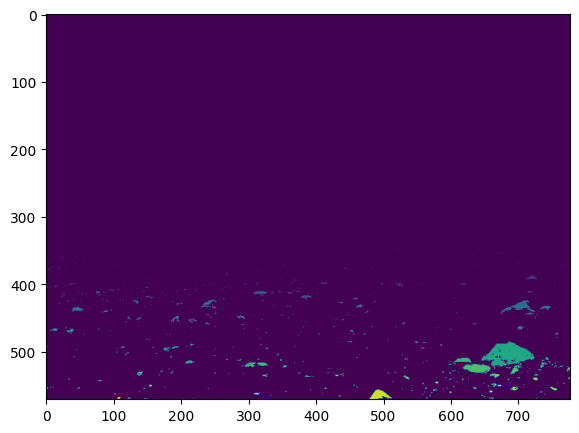

In [18]:
# TODO: determine the label image from the binary image
# using OpenCV's built-in connectedComponents function
# note that the binary array has to be converted to the uint8 data type
_, comp = cv2.connectedComponents(binary_image.astype(np.uint8))
print('comp', comp.shape, comp.dtype, comp.min(), comp.max())
# TODO: Use Matplotlib to draw the image
plt.figure()
plt.imshow(comp)

In [23]:
print(comp[500,700])

263


## 3. Centroid Computation

Finally, we need to compute the centroid position (in image coordinates) of each individual large
rock. By iterating through each component (obtained in the previous step), we can determine the
image coordinates of the pixels that belong in that component and compute the centroid position
by taking the mean over the image coordinates. To overcome noise and erroneous detections in
the data, we would also need to sort the components by size (number of pixels) and only use
components that are large enough (i.e. belonging to large rocks).

Centroid 1 x = 719.8928571428571 y = 390.57142857142856
Centroid 2 x = 317.0147058823529 y = 412.80882352941177
Centroid 3 x = 240.0 y = 428.6951219512195
Centroid 4 x = 701.5972222222222 y = 433.63194444444446
Centroid 5 x = 45.815384615384616 y = 437.3076923076923
Centroid 6 x = 684.6148648648649 y = 504.5251842751843
Centroid 7 x = 618.2049180327868 y = 513.016393442623
Centroid 8 x = 302.60869565217394 y = 519.6086956521739
Centroid 9 x = 320.42857142857144 y = 518.8214285714286
Centroid 10 x = 639.0253807106599 y = 525.0558375634517
Centroid 11 x = 695.561797752809 y = 526.7303370786517
Centroid 12 x = 493.94594594594594 y = 564.5405405405405


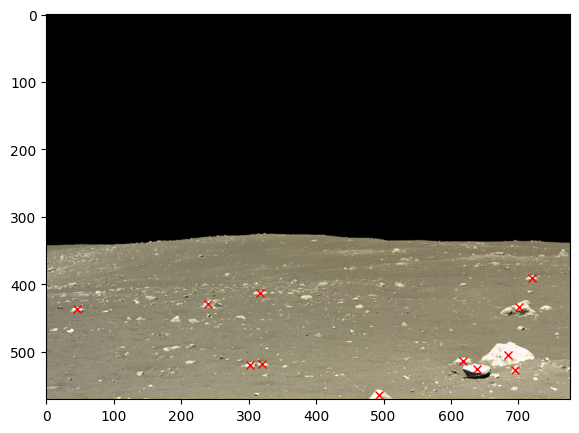

In [26]:
# TODO: loop through the components in the label image and
# calculate the mean X-coordinate and mean Y-coordinate of each component
# filter out components that are too small
num_components = comp.max()
min_num_pixels = 50

all_centroids_x = []
all_centroids_y = []
j = 0

for i in range(1, num_components+1):
  mask = comp == i
  y, x = np.nonzero(mask)
  if len(x) > min_num_pixels:
    #big rocks
    cx = x.mean()
    cy = y.mean()
    all_centroids_x.append(cx)
    all_centroids_y.append(cy)
    j += 1
    print('Centroid', j, 'x =', cx, 'y =', cy)
  #else:
    #small rocks
    #print('Filtered')


# TODO: Use Matplotlib to draw the image overlaid with X's
# indicating the location of individual rocks
plt.figure()
plt.imshow(input_image)
plt.plot(all_centroids_x, all_centroids_y, 'rx')